# Exploratory Data Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
from statsmodels.graphics.gofplots import qqplot
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

##Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

path_data='/content/gdrive/My Drive/test/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv(path_data + 'sample_higo.csv',sep=',') #read data
df.head()

,Unnamed: 0,No_Telp,Nama_Lokasi,Jam_Login,Nama,Email,Tahun_Lahir,Merek_HP,Digital_Interest,Location_Type,Umur,Prioritas
0,0,6286123461,Cafe Aska,10.30,Sisca,Sisca@gmail.com,1978,Iphone,Education,Tempat Makan,45,YA
1,1,62964618,Cafe Bianca,11.30,Rony,Rony@gmail.com,1992,Samsung,Marketing,Tempat Makan,31,TIDAK
2,2,62000286,Cafe Cantik,12.30,Coky,Coky@gmail.com,1985,Samsung,Marketing,Tempat Makan,38,TIDAK
3,3,62310982,Cafe Doremi,16.00,Jimin,Jimin@gmail.com,1987,Real me,Education,Tempat Makan,36,TIDAK
4,4,628863888,Cafe Eskula,18.00,Taehyung,Taehyung@gmail.com,1995,Samsung,Content Creator,Tempat Makan,28,TIDAK


In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df.head()

,No_Telp,Nama_Lokasi,Jam_Login,Nama,Email,Tahun_Lahir,Merek_HP,Digital_Interest,Location_Type,Umur,Prioritas
0,6286123461,Cafe Aska,10.30,Sisca,Sisca@gmail.com,1978,Iphone,Education,Tempat Makan,45,YA
1,62964618,Cafe Bianca,11.30,Rony,Rony@gmail.com,1992,Samsung,Marketing,Tempat Makan,31,TIDAK
2,62000286,Cafe Cantik,12.30,Coky,Coky@gmail.com,1985,Samsung,Marketing,Tempat Makan,38,TIDAK
3,62310982,Cafe Doremi,16.00,Jimin,Jimin@gmail.com,1987,Real me,Education,Tempat Makan,36,TIDAK
4,628863888,Cafe Eskula,18.00,Taehyung,Taehyung@gmail.com,1995,Samsung,Content Creator,Tempat Makan,28,TIDAK


## Data Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   No_Telp           153 non-null    int64  
 1   Nama_Lokasi       153 non-null    object 
 2   Jam_Login         153 non-null    float64
 3   Nama              153 non-null    object 
 4   Email             153 non-null    object 
 5   Tahun_Lahir       153 non-null    int64  
 6   Merek_HP          153 non-null    object 
 7   Digital_Interest  153 non-null    object 
 8   Location_Type     153 non-null    object 
 9   Umur              153 non-null    int64  
 10  Prioritas         153 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 13.3+ KB


In [ ]:
df.shape

(153, 11)

In [ ]:
#from datetime import datetime
#df['Umur2'] = datetime.now().year - df['Tahun_Lahir']  # Mencari umur

### Unique Value Counting

In [ ]:
# Value Counting
for col in df.columns:
  print('Values pada kolom {}:'.format(col))
  print(df[col].unique())
  print()

Values pada kolom No_Telp:
[ 6286123461    62964618    62000286    62310982   628863888    62111842
    62982671   629792871   623086161   621111097   629781766   625653919
   629137181  6263716316  6246431788   629397318  6258381681   628376719
   629371719   628631618  6293788651   629386181   623876319   629737610
   623458710   625391781    62073101    62907410    62980001    62300018
   629101881    62638191   625810999   629719161    62419001   629999111
   625555197   625381000   629371001    62991811     6251991   628199991
   627189991    62986611    62818199   623816181    62837171  6239178716
    62371781 62817191121 62817191122 62817191123 62817191124 62817191125
 62817191126 62817191127 62817191128 62817191129 62817191110 62817191111
  6281719112  6281719113  6281719114  6281719115  6281719116  6281719117
  6281719118  6281719119    62881911     6281811  6271588121  6271588122
  6271588123  6271588124  6271588125  6271588126  6271588127    62188881
    62188882    62188883

Tidak ada data yang bernilai null atau kosong.

In [ ]:
df.nunique().sort_values(ascending=True)

Location_Type        2
Prioritas            2
Merek_HP             5
Digital_Interest     5
Tahun_Lahir         23
Umur                23
Nama_Lokasi         30
Jam_Login           75
Nama                92
Email               92
No_Telp             93
dtype: int64

##Numerical & Categorical data

In [ ]:
# Membedakan data categorical dan numeric
num_dtypes=['int64','float64']
cat_dtypes=['object']

num_df = df.select_dtypes(include = num_dtypes)
cat_df = df.select_dtypes(include = cat_dtypes)
numericals = num_df.columns[1:] # Exclude column No_Telp
categoricals = cat_df.columns

print(numericals)
print(categoricals)

Index(['Jam_Login', 'Tahun_Lahir', 'Umur'], dtype='object')
Index(['Nama_Lokasi', 'Nama', 'Email', 'Merek_HP', 'Digital_Interest',
       'Location_Type', 'Prioritas'],
      dtype='object')


#Numericals

##Summary Statistics

In [ ]:
df[numericals].describe().style.background_gradient()

,Jam_Login,Tahun_Lahir,Umur
count,153.000000,153.000000,153.000000
mean,14.666405,1997.000000,26.000000
std,4.258017,5.405893,5.405893
min,8.150000,1978.000000,17.000000
25%,10.270000,1995.000000,22.000000
50%,16.390000,1998.000000,25.000000
75%,18.550000,2001.000000,28.000000
max,21.000000,2006.000000,45.000000


Data mInimal login adalah saat pukul 8.15 dan maksimal login saat pukul 21.00. Rata-rata tahun lahir adalah 1997 dengan tahun tertua adalah 1978 dengan usia 45 dan tahun lahir termuda adalah 2006 dengan usia 17.

## Checking Missing Value

In [ ]:
df.isnull().sum()

No_Telp             0
Nama_Lokasi         0
Jam_Login           0
Nama                0
Email               0
Tahun_Lahir         0
Merek_HP            0
Digital_Interest    0
Location_Type       0
Umur                0
Prioritas           0
dtype: int64

In [ ]:
pd.options.display.float_format = '{:,.2f} %'.format
print((df.isnull().sum()/len(df))*100)
pd.options.display.float_format = '{:,.2f}'.format

No_Telp            0.00 %
Nama_Lokasi        0.00 %
Jam_Login          0.00 %
Nama               0.00 %
Email              0.00 %
Tahun_Lahir        0.00 %
Merek_HP           0.00 %
Digital_Interest   0.00 %
Location_Type      0.00 %
Umur               0.00 %
Prioritas          0.00 %
dtype: float64


##Checking Duplicated Value

In [ ]:
df.duplicated().sum()

1

In [ ]:
# To check duplicated values 
print(df.duplicated().value_counts()) 

False    152
True       1
dtype: int64


#List 10 Data Teratas berdasarkan umur tertua.

In [ ]:
df.sort_values(by = "Umur", ascending = False).head(10)

,No_Telp,Nama_Lokasi,Jam_Login,Nama,Email,Tahun_Lahir,Merek_HP,Digital_Interest,Location_Type,Umur,Prioritas
0,6286123461,Cafe Aska,10.30,Sisca,Sisca@gmail.com,1978,Iphone,Education,Tempat Makan,45,YA
28,62000286,Resto Pagi Sore,12.30,Coky,Coky@gmail.com,1985,Samsung,Marketing,Tempat Makan,38,TIDAK
2,62000286,Cafe Cantik,12.30,Coky,Coky@gmail.com,1985,Samsung,Marketing,Tempat Makan,38,TIDAK
45,62000286,Resto Simpang Raya,12.23,Coky,Coky@gmail.com,1985,Samsung,Marketing,Tempat Makan,38,TIDAK
44,62000286,Resto Cendana,12.16,Coky,Coky@gmail.com,1985,Samsung,Marketing,Tempat Makan,38,TIDAK
39,62000286,Resto Sederhana,11.30,Coky,Coky@gmail.com,1985,Samsung,Marketing,Tempat Makan,38,TIDAK
38,62000286,Resto Pagi Sore,11.43,Coky,Coky@gmail.com,1985,Samsung,Marketing,Tempat Makan,38,TIDAK
35,62000286,Resto Simpang Raya,12.15,Coky,Coky@gmail.com,1985,Samsung,Marketing,Tempat Makan,38,TIDAK
34,62000286,Resto Cendana,11.45,Coky,Coky@gmail.com,1985,Samsung,Marketing,Tempat Makan,38,TIDAK
29,62000286,Resto Sederhana,11.30,Coky,Coky@gmail.com,1985,Samsung,Marketing,Tempat Makan,38,TIDAK


#List 10 Data Teratas berdasarkan umur termuda

In [ ]:
df.sort_values(by = "Umur", ascending = True).head(10)

,No_Telp,Nama_Lokasi,Jam_Login,Nama,Email,Tahun_Lahir,Merek_HP,Digital_Interest,Location_Type,Umur,Prioritas
53,625555197,SMA Angkasa,11.12,Zizi,Zizi@gmail.com,2006,Iphone,Marketing,Tempat Makan,17,YA
149,629999111,SMP Bima Sakti,9.00,Bian,Bian@gmail.com,2005,Iphone,Programmer,Sekolah,18,TIDAK
48,625810999,SMP As Sallam 1,9.15,Alfi,Alfi@gmail.com,2005,Real me,Content Creator,Tempat Makan,18,TIDAK
50,62419001,SMP Bima Sakti,10.00,Askara,Askara@gmail.com,2005,Real me,Content Creator,Tempat Makan,18,TIDAK
52,629999111,SMA Nusantara,10.15,Bian,Bian@gmail.com,2005,Iphone,Programmer,Tempat Makan,18,TIDAK
54,625381000,SMA Galaxy,10.15,Alga,Alga@gmail.com,2005,Iphone,Marketing,Tempat Makan,18,TIDAK
61,629999111,SMP Bima Sakti,9.45,Bian,Bian@gmail.com,2005,Iphone,Programmer,Tempat Makan,18,TIDAK
36,62980001,Resto Cik Liem,16.23,Titi,Titi@gmail.com,2004,Iphone,Banking,Tempat Makan,19,YA
49,629719161,SMP Binus,8.30,Alfa,Alfa@gmail.com,2004,Real me,Content Creator,Tempat Makan,19,TIDAK
55,629371001,SMA Tiansi,10.05,Marsya,Marsya@gmail.com,2004,Iphone,Marketing,Tempat Makan,19,YA


#10 Data teratas berdasarkan waktu login terakhir.

In [ ]:
df.sort_values(by = "Jam_Login", ascending = False).head(10)

,No_Telp,Nama_Lokasi,Jam_Login,Nama,Email,Tahun_Lahir,Merek_HP,Digital_Interest,Location_Type,Umur,Prioritas
14,6246431788,Cafe Harris,21.00,Fiqi,Fiqi@gmail.com,1998,Samsung,Marketing,Tempat Makan,25,TIDAK
89,629737610,Cafe Cantik,20.15,Sinta,Sinta@gmail.com,2001,Iphone,Programmer,Tempat Makan,22,YA
138,62111842,Cafe Fanta,20.15,Jungkok,Jungkok@gmail.com,1997,Samsung,Content Creator,Tempat Makan,26,TIDAK
94,62111842,Cafe Harris,20.15,Jungkok,Jungkok@gmail.com,1997,Samsung,Content Creator,Tempat Makan,26,TIDAK
80,628863888,Cafe Eskula,20.15,Taehyung,Taehyung@gmail.com,1995,Samsung,Content Creator,Tempat Makan,28,TIDAK
20,6293788651,Cafe Cantik,20.00,Ika,Ika@gmail.com,2001,Real me,Education,Tempat Makan,22,YA
72,62371781,Cafe Doremi,20.00,Kiki,Kiki@gmail.com,2001,Iphone,Content Creator,Tempat Makan,22,TIDAK
40,62300018,Resto Gacoan,20.00,Nurul,Nurul@gmail.com,1999,Samsung,Programmer,Tempat Makan,24,YA
86,629737610,Cafe Bianca,20.00,Sinta,Sinta@gmail.com,2001,Iphone,Programmer,Tempat Makan,22,YA
9,621111097,Cafe Junior,20.00,Sinta,Sinta@gmail.com,1989,Xiaomi,Programmer,Tempat Makan,34,YA


#10 Data teratas berdasarkan waktu login terawal.

In [ ]:
df.sort_values(by = "Jam_Login", ascending = True).head(10)

,No_Telp,Nama_Lokasi,Jam_Login,Nama,Email,Tahun_Lahir,Merek_HP,Digital_Interest,Location_Type,Umur,Prioritas
150,62971901,SMP Al Islam 1,8.15,Mia,Mia@gmail.com,1997,Samsung,Education,Sekolah,26,YA
151,62971901,SMP Al Islam 1,8.17,Mia,Mia@gmail.com,1997,Samsung,Education,Sekolah,26,YA
60,6251991,SMP Binus,8.19,Odin,Odin@gmail.com,1997,Xiaomi,Education,Tempat Makan,26,TIDAK
49,629719161,SMP Binus,8.30,Alfa,Alfa@gmail.com,2004,Real me,Content Creator,Tempat Makan,19,TIDAK
57,6263716316,SMP As Sallam 2,8.30,Yumna,Yumna@gmail.com,2000,Samsung,Marketing,Tempat Makan,23,YA
118,62881911,SMP Binus,8.45,Kafka,Kafka@gmail.com,1998,Samsung,Education,Sekolah,25,TIDAK
127,6271588127,SMP Al Islam 1,8.45,Poma,Poma@gmail.com,1999,Samsung,Education,Sekolah,24,TIDAK
58,62638191,SMP Al Islam 1,8.55,Didin,Didin@gmail.com,1998,Real me,Education,Tempat Makan,25,YA
47,62638191,SMP Al Islam 1,9.00,Didin,Didin@gmail.com,1998,Real me,Education,Tempat Makan,25,YA
149,629999111,SMP Bima Sakti,9.00,Bian,Bian@gmail.com,2005,Iphone,Programmer,Sekolah,18,TIDAK


#The mean and count "Jam-Login" and "Umur" for different levels of "Prioritas".

In [ ]:
df.pivot_table(
    ["Jam_Login", "Umur"],
    ["Prioritas"],
    aggfunc = ["mean", "count"],
)

mean           count     
          Jam_Login  Umur Jam_Login Umur
Prioritas                               
TIDAK         14.29 26.93        80   80
YA            15.08 24.99        73   73

#Data distribution of continuous variables'

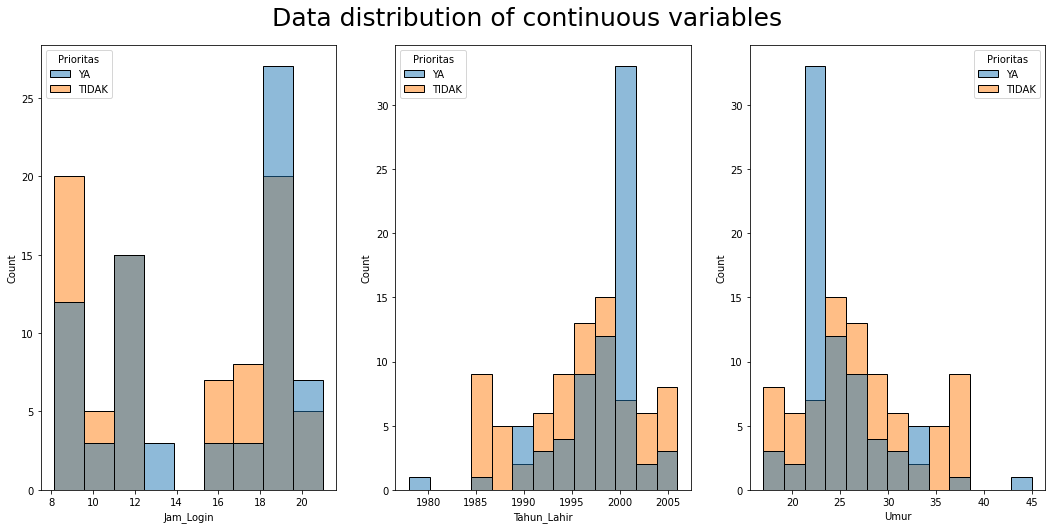

In [ ]:
c = 1 
nrows = round(len(df[numericals].columns) / 3) + 1
fig = plt.figure(figsize=(18,18))
for i in df[numericals].columns:
    plt.subplot(nrows, 3, c)
    sns.histplot(x=i, hue='Prioritas', data=df)
    c += 1 
plt.suptitle('Data distribution of continuous variables', fontsize=25, y=0.91)
plt.show()

#Data distribution of continuous variables

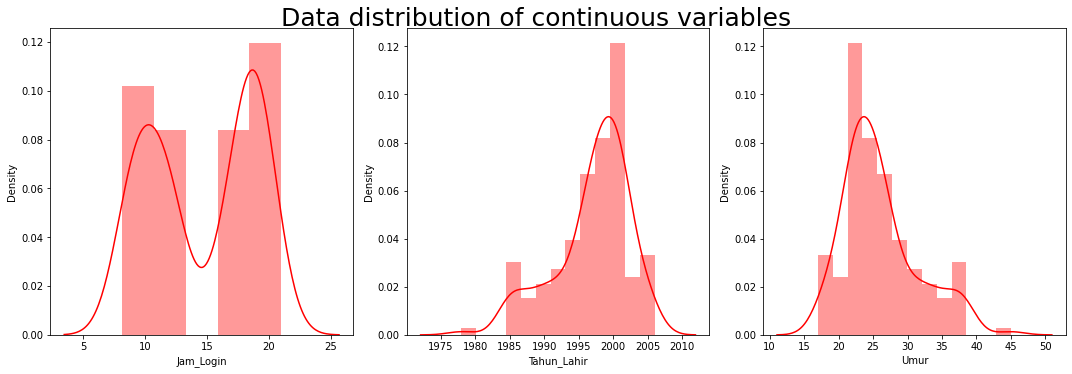

In [ ]:
plt.figure(figsize=(15, 5))
for i in range(0, len(numericals)):
    plt.subplot(1, len(numericals), i+1)
    sns.distplot(df[numericals[i]], color='red')
plt.suptitle('Data distribution of continuous variables', fontsize=25, y=1.03)
plt.tight_layout()

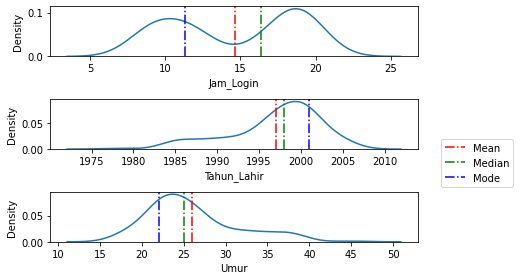

In [ ]:
for i in range(0, len(numericals)):
    plt.subplot(3, len(numericals)/2, i+1)
    mean=df[numericals[i]].mean()
    median=df[numericals[i]].median()
    mode=df[numericals[i]].mode().values[0]
    sns.distplot(df[numericals[i]],hist=False)
    plt.axvline(mean, color='r', linestyle='-.', label="Mean")
    plt.axvline(median, color='g', linestyle='-.', label="Median")
    plt.axvline(mode, color='b', linestyle='-.', label="Mode")
    plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1),loc='lower left')
plt.show()

# Count Outlier

In [ ]:
Q1 = df[numericals].quantile(0.25)
Q3 = df[numericals].quantile(0.75)
IQR = Q3 - Q1 # Inter quartile range (IQR)

print('Total Outliers:')
((df[numericals] < (Q1 - 1.5 * IQR)) | (df[numericals] > (Q3 + 1.5 * IQR))).sum()

Total Outliers:


Jam_Login       0
Tahun_Lahir    10
Umur           10
dtype: int64

* Terlihat bahwa Jam_Login merupakan grafik bimodal
* Terlihat bahwa Tahun_Lahir merupakan distribusi negatif skewness (skeweness ke kiri). Selain itu juga mempunyai outlier 10.
* Terlihat bahwa Umur merupakan distribusi positif skewness (skeweness ke kanan). Selain itu juga mempunyai outliers 10

#"Umur" Count Distribution

Text(0.5, 1.0, 'Umur Count Distribution')

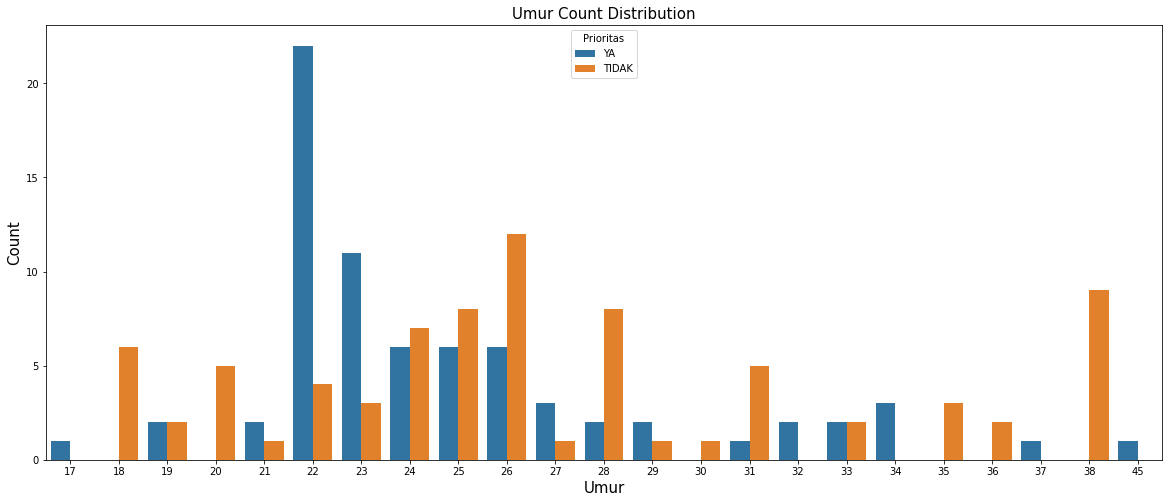

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'Umur',  hue='Prioritas', data = df)
ax.set_xlabel('Umur', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Umur Count Distribution', fontsize=15)

In [ ]:
df['Umur'].value_counts()

22    26
26    18
23    14
25    14
24    13
28    10
38     9
18     6
31     6
20     5
27     4
19     4
33     4
29     3
21     3
35     3
34     3
32     2
36     2
17     1
37     1
30     1
45     1
Name: Umur, dtype: int64

#Box Plot

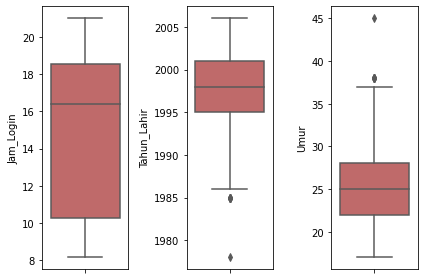

In [ ]:
for col in range(0, len(numericals)):
    plt.subplot(1, len(numericals), col+1)
    sns.boxplot(y=df[numericals[col]], color='indianred', orient='v')
    plt.tight_layout()

#Heatmap

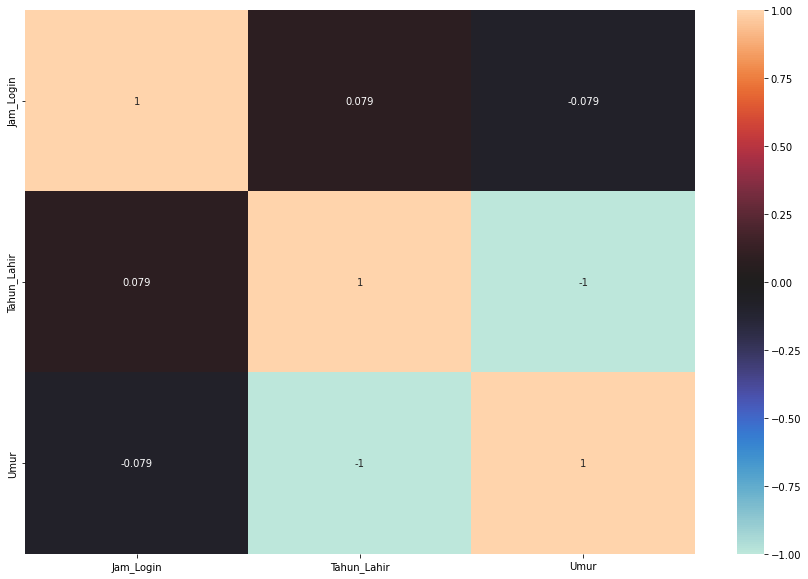

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df[numericals].select_dtypes(include=['int','float']).corr(),annot=True,center = 0)
plt.show()

# Categoricals

In [ ]:
df[categoricals].describe()

,Nama_Lokasi,Nama,Email,Merek_HP,Digital_Interest,Location_Type,Prioritas
count,153,153,153,153,153,153,153
unique,30,92,92,5,5,2,2
top,SMP Al Islam 2,Sinta,Sinta@gmail.com,Samsung,Education,Tempat Makan,TIDAK
freq,9,17,17,74,47,119,80


##Bar Chart

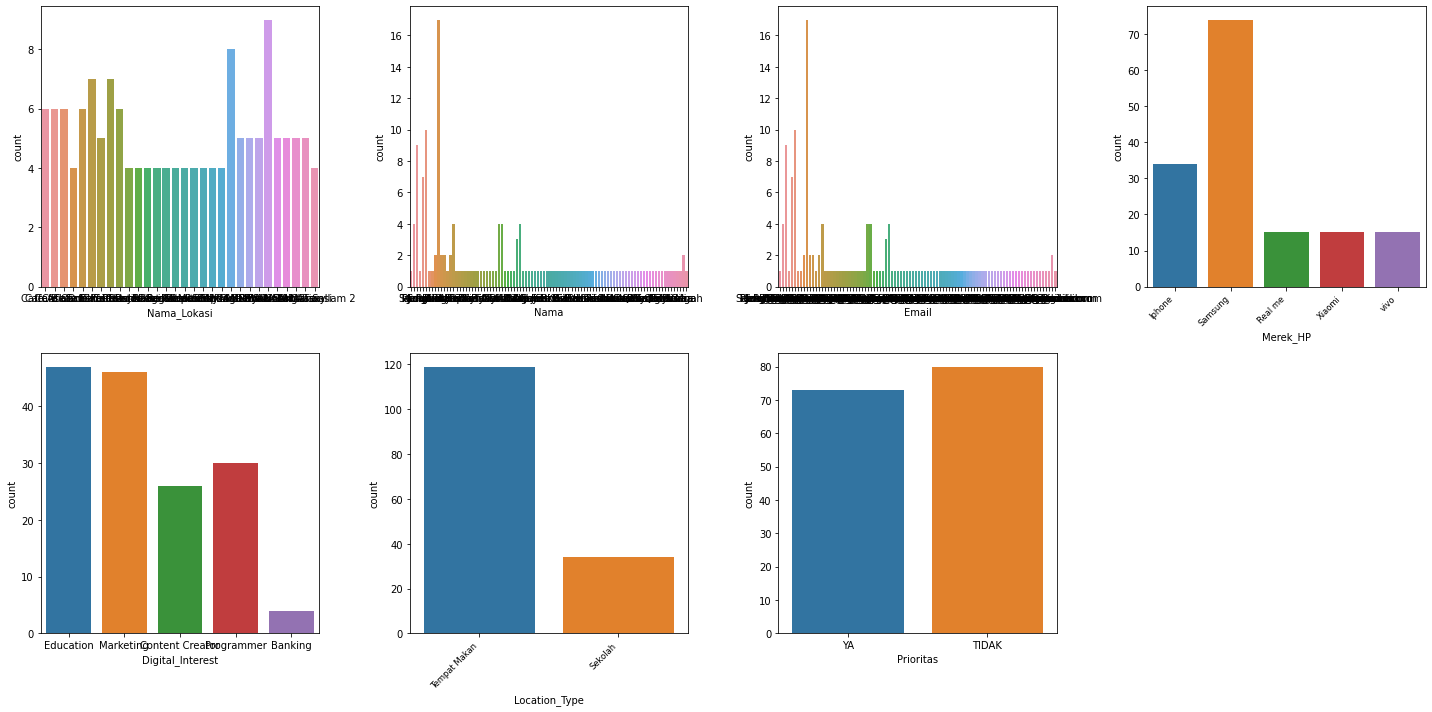

In [ ]:
plt.figure(figsize=(20,10))
for i in range(0, len(categoricals)):
    plt.subplot(2, round(len(categoricals)/2,0), i+1)
    if i+1 in (4,6):
      sns.countplot(df[categoricals[i]], orient='v')
      plt.xticks(
      rotation=45, 
      horizontalalignment='right',
      fontweight='light',
      fontsize='small'  
)
    else:
       sns.countplot(df[categoricals[i]], orient='v')
    plt.tight_layout()

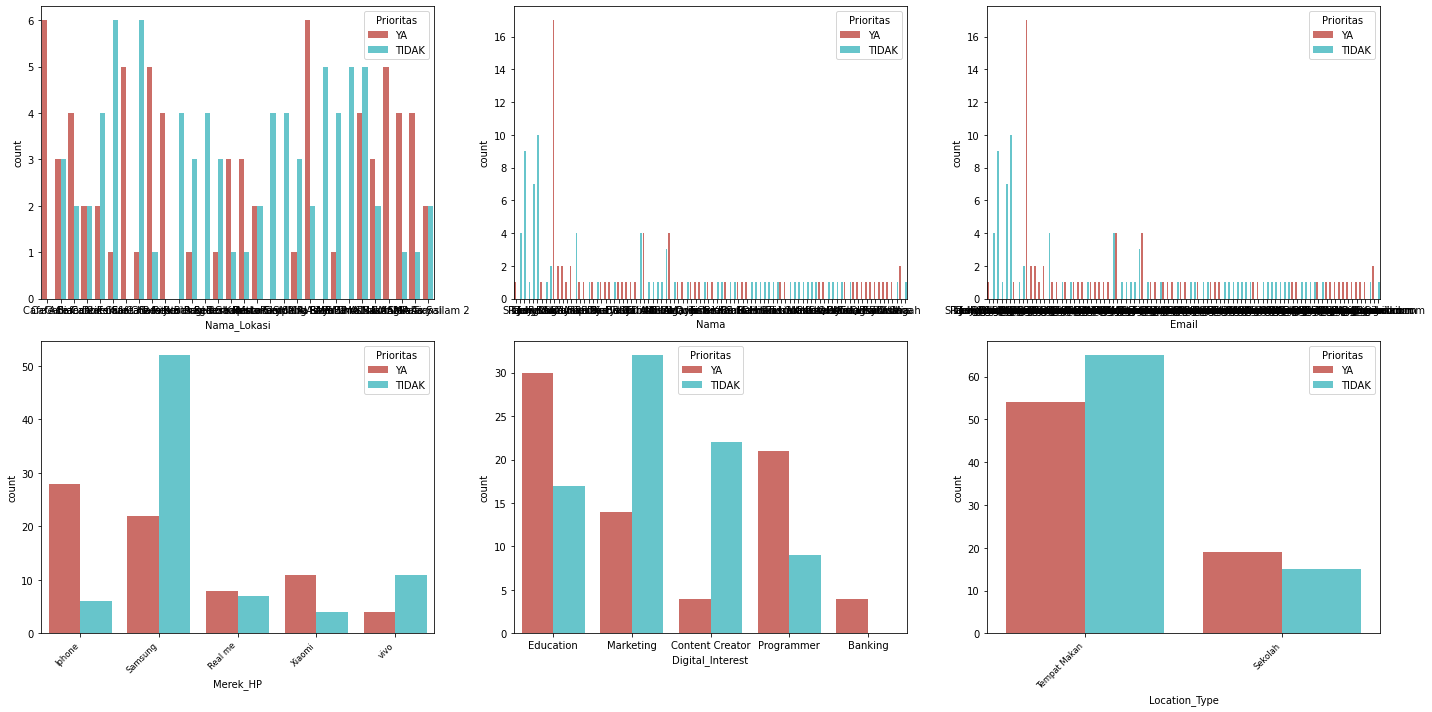

In [ ]:
plt.figure(figsize=(20,10))
for i in range(0, len(categoricals)-1):
    plt.subplot(2, round((len(categoricals)-1)/2,0), i+1)
    if i+1 in (4,6):
      sns.countplot(x=categoricals[i],hue='Prioritas', hue_order=['YA', 'TIDAK'], data=df[categoricals], palette='hls', orient='v')
      plt.xticks(
      rotation=45, 
      horizontalalignment='right',
      fontweight='light',
      fontsize='small'  
)
    else:
       sns.countplot(x=categoricals[i],hue='Prioritas', hue_order=['YA', 'TIDAK'], data=df[categoricals], palette='hls', orient='v')
    plt.tight_layout()

#10 Besar Data Nama by Umur

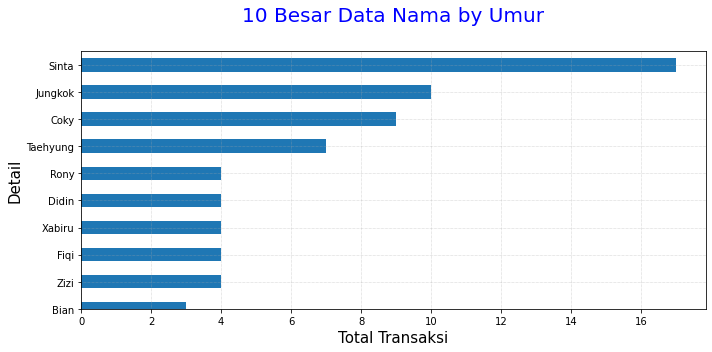

In [ ]:
df.groupby(['Nama'])['Umur'].count().sort_values(ascending = True).tail(10).plot(kind = 'barh')
plt.title('10 Besar Data Nama by Umur', loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Total Transaksi', fontsize = 15)
plt.ylabel('Detail', fontsize = 15)
plt.grid(color='darkgray', linestyle=':',linewidth=0.5)
plt.ylim(ymin=0)
plt.gcf().set_size_inches(10,5)
plt.tight_layout()
plt.show()

##Cek Nama Sinta

In [ ]:
temp = df[df['Nama'] == 'Sinta'][['Nama_Lokasi', 'Umur']]
print(f"Lokasi yang dikunjungi: {temp['Nama_Lokasi'].unique()}, Total transacted: {temp['Umur'].count()}")

Lokasi yang dikunjungi: ['Cafe Junior' 'Cafe Gio' 'Cafe Ianka' 'Cafe Cantik' 'Cafe Aska'
 'Cafe Bianca' 'Cafe Doremi'], Total transacted: 17


In [ ]:
Sinta_name= df[df['Nama'] == 'Sinta']
Sinta_name

,No_Telp,Nama_Lokasi,Jam_Login,Nama,Email,Tahun_Lahir,Merek_HP,Digital_Interest,Location_Type,Umur,Prioritas
9,621111097,Cafe Junior,20.00,Sinta,Sinta@gmail.com,1989,Xiaomi,Programmer,Tempat Makan,34,YA
24,629737610,Cafe Gio,19.37,Sinta,Sinta@gmail.com,2001,Iphone,Programmer,Tempat Makan,22,YA
75,629737610,Cafe Gio,19.25,Sinta,Sinta@gmail.com,2001,Iphone,Programmer,Tempat Makan,22,YA
77,629737610,Cafe Ianka,20.00,Sinta,Sinta@gmail.com,2001,Iphone,Programmer,Tempat Makan,22,YA
78,629737610,Cafe Junior,19.44,Sinta,Sinta@gmail.com,2001,Iphone,Programmer,Tempat Makan,22,YA
79,629737610,Cafe Cantik,19.23,Sinta,Sinta@gmail.com,2001,Iphone,Programmer,Tempat Makan,22,YA
82,629737610,Cafe Aska,18.55,Sinta,Sinta@gmail.com,2001,Iphone,Programmer,Tempat Makan,22,YA
84,629737610,Cafe Ianka,19.05,Sinta,Sinta@gmail.com,2001,Iphone,Programmer,Tempat Makan,22,YA
85,629737610,Cafe Junior,18.16,Sinta,Sinta@gmail.com,2001,Iphone,Programmer,Tempat Makan,22,YA
86,629737610,Cafe Bianca,20.00,Sinta,Sinta@gmail.com,2001,Iphone,Programmer,Tempat Makan,22,YA


##Cek Nama Jungkok

In [ ]:
temp2 = df[df['Nama'] == 'Jungkok'][['Nama_Lokasi', 'Umur']]
print(f"Lokasi yang dikunjungi: {temp2['Nama_Lokasi'].unique()}, Total transacted: {temp2['Umur'].count()}")

Lokasi yang dikunjungi: ['Cafe Fanta' 'Cafe Harris' 'SMP As Sallam 1'], Total transacted: 10


In [ ]:
Jungkok_name= df[df['Nama'] == 'Jungkok']
Jungkok_name

,No_Telp,Nama_Lokasi,Jam_Login,Nama,Email,Tahun_Lahir,Merek_HP,Digital_Interest,Location_Type,Umur,Prioritas
5,62111842,Cafe Fanta,18.00,Jungkok,Jungkok@gmail.com,1997,Samsung,Content Creator,Tempat Makan,26,TIDAK
74,62111842,Cafe Fanta,18.50,Jungkok,Jungkok@gmail.com,1997,Samsung,Content Creator,Tempat Makan,26,TIDAK
76,62111842,Cafe Harris,18.16,Jungkok,Jungkok@gmail.com,1997,Samsung,Content Creator,Tempat Makan,26,TIDAK
81,62111842,Cafe Fanta,18.35,Jungkok,Jungkok@gmail.com,1997,Samsung,Content Creator,Tempat Makan,26,TIDAK
83,62111842,Cafe Harris,18.45,Jungkok,Jungkok@gmail.com,1997,Samsung,Content Creator,Tempat Makan,26,TIDAK
92,62111842,Cafe Fanta,18.45,Jungkok,Jungkok@gmail.com,1997,Samsung,Content Creator,Tempat Makan,26,TIDAK
94,62111842,Cafe Harris,20.15,Jungkok,Jungkok@gmail.com,1997,Samsung,Content Creator,Tempat Makan,26,TIDAK
138,62111842,Cafe Fanta,20.15,Jungkok,Jungkok@gmail.com,1997,Samsung,Content Creator,Tempat Makan,26,TIDAK
140,62111842,Cafe Harris,18.39,Jungkok,Jungkok@gmail.com,1997,Samsung,Content Creator,Tempat Makan,26,TIDAK
147,62111842,SMP As Sallam 1,9.24,Jungkok,Jungkok@gmail.com,1997,Samsung,Content Creator,Sekolah,26,TIDAK


##Cek Nama Coky

In [ ]:
temp3 = df[df['Nama'] == 'Coky'][['Nama_Lokasi', 'Umur']]
print(f"Lokasi yang dikunjungi: {temp3['Nama_Lokasi'].unique()}, Total transacted: {temp3['Umur'].count()}")

Lokasi yang dikunjungi: ['Cafe Cantik' 'Resto Pagi Sore' 'Resto Sederhana' 'Resto Cendana'
 'Resto Simpang Raya'], Total transacted: 9


In [ ]:
Coky_name= df[df['Nama'] == 'Coky']
Coky_name

,No_Telp,Nama_Lokasi,Jam_Login,Nama,Email,Tahun_Lahir,Merek_HP,Digital_Interest,Location_Type,Umur,Prioritas
2,62000286,Cafe Cantik,12.30,Coky,Coky@gmail.com,1985,Samsung,Marketing,Tempat Makan,38,TIDAK
28,62000286,Resto Pagi Sore,12.30,Coky,Coky@gmail.com,1985,Samsung,Marketing,Tempat Makan,38,TIDAK
29,62000286,Resto Sederhana,11.30,Coky,Coky@gmail.com,1985,Samsung,Marketing,Tempat Makan,38,TIDAK
34,62000286,Resto Cendana,11.45,Coky,Coky@gmail.com,1985,Samsung,Marketing,Tempat Makan,38,TIDAK
35,62000286,Resto Simpang Raya,12.15,Coky,Coky@gmail.com,1985,Samsung,Marketing,Tempat Makan,38,TIDAK
38,62000286,Resto Pagi Sore,11.43,Coky,Coky@gmail.com,1985,Samsung,Marketing,Tempat Makan,38,TIDAK
39,62000286,Resto Sederhana,11.30,Coky,Coky@gmail.com,1985,Samsung,Marketing,Tempat Makan,38,TIDAK
44,62000286,Resto Cendana,12.16,Coky,Coky@gmail.com,1985,Samsung,Marketing,Tempat Makan,38,TIDAK
45,62000286,Resto Simpang Raya,12.23,Coky,Coky@gmail.com,1985,Samsung,Marketing,Tempat Makan,38,TIDAK


#10 Besar Data Nama_Lokasi by Umur

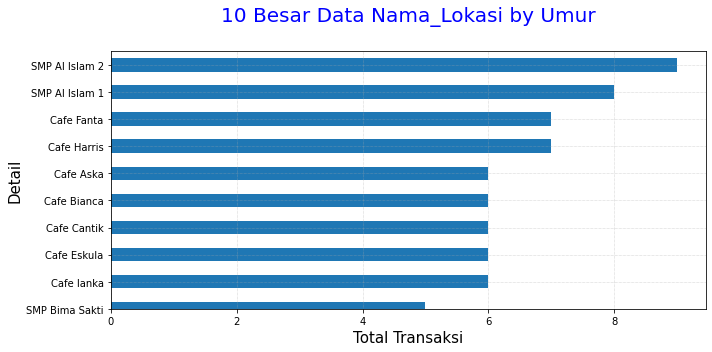

In [ ]:
df.groupby(['Nama_Lokasi'])['Umur'].count().sort_values(ascending = True).tail(10).plot(kind = 'barh')
plt.title('10 Besar Data Nama_Lokasi by Umur', loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Total Transaksi', fontsize = 15)
plt.ylabel('Detail', fontsize = 15)
plt.grid(color='darkgray', linestyle=':',linewidth=0.5)
plt.ylim(ymin=0)
plt.gcf().set_size_inches(10,5)
plt.tight_layout()
plt.show()

##Cek SMP Al Islam 2

In [ ]:
smp1_name= df[df['Nama_Lokasi'] == 'SMP Al Islam 2']
smp1_name

,No_Telp,Nama_Lokasi,Jam_Login,Nama,Email,Tahun_Lahir,Merek_HP,Digital_Interest,Location_Type,Umur,Prioritas
51,629792871,SMP Al Islam 2,9.30,Dion,Dion@gmail.com,2001,Real me,Education,Tempat Makan,22,TIDAK
56,62991811,SMP Al Islam 2,9.20,Maria,Maria@gmail.com,2001,Iphone,Marketing,Tempat Makan,22,YA
62,6246431788,SMP Al Islam 2,10.27,Fiqi,Fiqi@gmail.com,1998,Samsung,Marketing,Tempat Makan,25,TIDAK
67,629999111,SMP Al Islam 2,9.12,Janes,Janes@gmail.com,1999,Samsung,Education,Tempat Makan,24,TIDAK
120,6246431788,SMP Al Islam 2,9.55,Fiqi,Fiqi@gmail.com,1998,Samsung,Marketing,Sekolah,25,TIDAK
125,6271588125,SMP Al Islam 2,9.30,Ahmad,Ahmad@gmail.com,1999,Samsung,Education,Sekolah,24,TIDAK
131,62188883,SMP Al Islam 2,9.44,Komaira,Komaira@gmail.com,2000,Samsung,Education,Sekolah,23,YA
136,62188887,SMP Al Islam 2,9.55,Esyu,Esyu@gmail.com,2000,Samsung,Education,Sekolah,23,YA
141,6258019999,SMP Al Islam 2,9.24,Poisma,Poisma@gmail.com,1998,Xiaomi,Education,Sekolah,25,YA


##Cek SMP Al Islam 1

In [ ]:
smp2_name= df[df['Nama_Lokasi'] == 'SMP Al Islam 1']
smp2_name

,No_Telp,Nama_Lokasi,Jam_Login,Nama,Email,Tahun_Lahir,Merek_HP,Digital_Interest,Location_Type,Umur,Prioritas
47,62638191,SMP Al Islam 1,9.00,Didin,Didin@gmail.com,1998,Real me,Education,Tempat Makan,25,YA
58,62638191,SMP Al Islam 1,8.55,Didin,Didin@gmail.com,1998,Real me,Education,Tempat Makan,25,YA
116,62638191,SMP Al Islam 1,9.30,Didin,Didin@gmail.com,1998,Real me,Education,Sekolah,25,YA
127,6271588127,SMP Al Islam 1,8.45,Poma,Poma@gmail.com,1999,Samsung,Education,Sekolah,24,TIDAK
146,62638191,SMP Al Islam 1,9.23,Didin,Didin@gmail.com,1998,Real me,Education,Sekolah,25,YA
150,62971901,SMP Al Islam 1,8.15,Mia,Mia@gmail.com,1997,Samsung,Education,Sekolah,26,YA
151,62971901,SMP Al Islam 1,8.17,Mia,Mia@gmail.com,1997,Samsung,Education,Sekolah,26,YA
152,622221901,SMP Al Islam 1,9.12,Gagah,Gagah@gmail.com,1998,Samsung,Education,Sekolah,25,TIDAK


##Cek Cafe Fanta

In [ ]:
cafe_fanta= df[df['Nama_Lokasi'] == 'Cafe Fanta']
cafe_fanta

,No_Telp,Nama_Lokasi,Jam_Login,Nama,Email,Tahun_Lahir,Merek_HP,Digital_Interest,Location_Type,Umur,Prioritas
5,62111842,Cafe Fanta,18.00,Jungkok,Jungkok@gmail.com,1997,Samsung,Content Creator,Tempat Makan,26,TIDAK
12,629137181,Cafe Fanta,19.45,Zulfa,Zulfa@gmail.com,2002,Xiaomi,Marketing,Tempat Makan,21,YA
23,623086161,Cafe Fanta,19.05,Barra,Barra@gmail.com,1990,Xiaomi,Programmer,Tempat Makan,33,TIDAK
74,62111842,Cafe Fanta,18.50,Jungkok,Jungkok@gmail.com,1997,Samsung,Content Creator,Tempat Makan,26,TIDAK
81,62111842,Cafe Fanta,18.35,Jungkok,Jungkok@gmail.com,1997,Samsung,Content Creator,Tempat Makan,26,TIDAK
92,62111842,Cafe Fanta,18.45,Jungkok,Jungkok@gmail.com,1997,Samsung,Content Creator,Tempat Makan,26,TIDAK
138,62111842,Cafe Fanta,20.15,Jungkok,Jungkok@gmail.com,1997,Samsung,Content Creator,Tempat Makan,26,TIDAK


#10 Besar Email by Umur

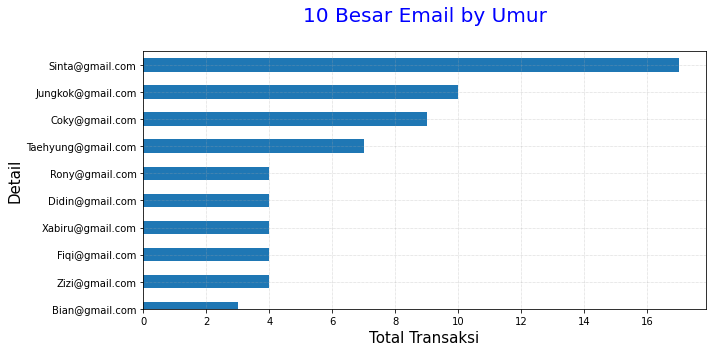

In [ ]:
df.groupby(['Email'])['Umur'].count().sort_values(ascending = True).tail(10).plot(kind = 'barh')
plt.title('10 Besar Email by Umur', loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Total Transaksi', fontsize = 15)
plt.ylabel('Detail', fontsize = 15)
plt.grid(color='darkgray', linestyle=':',linewidth=0.5)
plt.ylim(ymin=0)
plt.gcf().set_size_inches(10,5)
plt.tight_layout()
plt.show()

#20 Besar Data Nama & Nama Lokasi by Umur

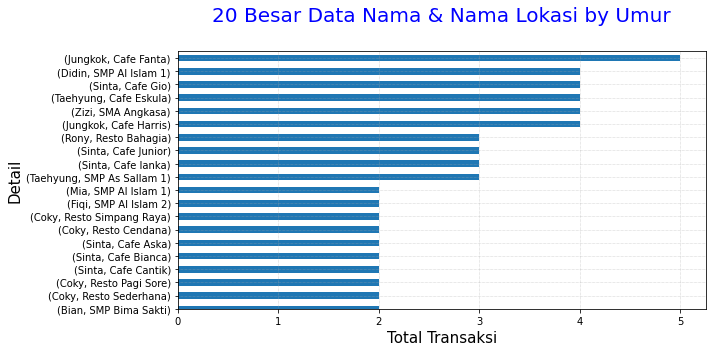

In [ ]:
df.groupby(['Nama','Nama_Lokasi'])['Umur'].count().sort_values(ascending = True).tail(20).plot(kind = 'barh')
plt.title('20 Besar Data Nama & Nama Lokasi by Umur', loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Total Transaksi', fontsize = 15)
plt.ylabel('Detail', fontsize = 15)
plt.grid(color='darkgray', linestyle=':',linewidth=0.5)
plt.ylim(ymin=0)
plt.gcf().set_size_inches(10,5)
plt.tight_layout()
plt.show()

#10 Besar Data Nama & Digital Interest by Umur

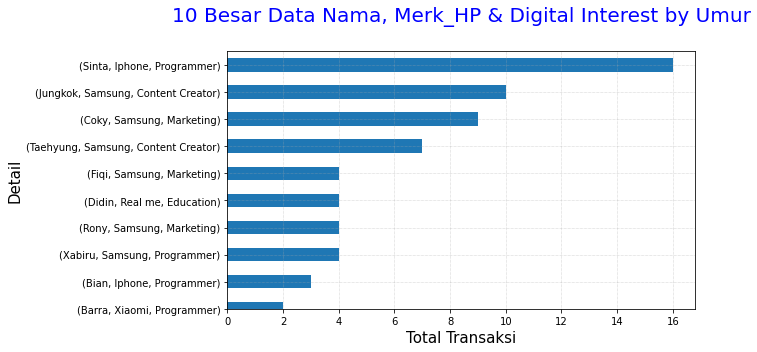

In [ ]:
df.groupby(['Nama','Merek_HP','Digital_Interest'])['Umur'].count().sort_values(ascending = True).tail(10).plot(kind = 'barh')
plt.title('10 Besar Data Nama, Merk_HP & Digital Interest by Umur', loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Total Transaksi', fontsize = 15)
plt.ylabel('Detail', fontsize = 15)
plt.grid(color='darkgray', linestyle=':',linewidth=0.5)
plt.ylim(ymin=0)
plt.gcf().set_size_inches(10,5)
plt.tight_layout()
plt.show()

In [ ]:
df.groupby(['Prioritas']).Prioritas.agg('count')

Prioritas
TIDAK    80
YA       73
Name: Prioritas, dtype: int64

#Checking Target Imbalance

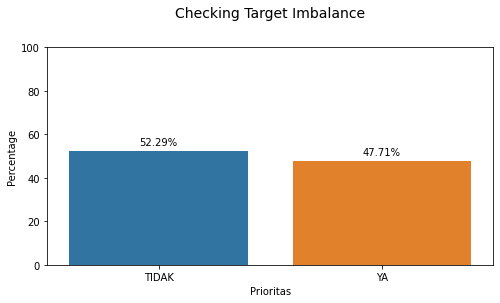

In [ ]:
Segmentasi = df['Prioritas'].value_counts()*100 / len(df.index)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4), sharey=True)
ax = sns.barplot(x=Segmentasi.index, y=Segmentasi.values)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

ax.set(xlabel='Prioritas', ylabel='Percentage')
plt.title('Checking Target Imbalance', loc='center',pad=30, fontsize=14, color='black')
#plt.text(-0.5, 105, 'Checking Target Imbalance', style = 'normal', fontsize=14)
ax.set(ylim=(0, 100))

warnings.filterwarnings("ignore")

In [ ]:
df['Prioritas']=df['Prioritas'].map({'YA':0,'TIDAK':1})

#Outliers Removal

In [ ]:
Q1 = df.quantile(0.05)
Q3 = df.quantile(0.95)
df = df[~((df< (Q1)) |(df> (Q3))).any(axis=1)]

In [ ]:
df.drop_duplicates() #drop duplicate

,No_Telp,Nama_Lokasi,Jam_Login,Nama,Email,Tahun_Lahir,Merek_HP,Digital_Interest,Location_Type,Umur,Prioritas
1,62964618,Cafe Bianca,11.30,Rony,Rony@gmail.com,1992,Samsung,Marketing,Tempat Makan,31,1
2,62000286,Cafe Cantik,12.30,Coky,Coky@gmail.com,1985,Samsung,Marketing,Tempat Makan,38,1
3,62310982,Cafe Doremi,16.00,Jimin,Jimin@gmail.com,1987,Real me,Education,Tempat Makan,36,1
4,628863888,Cafe Eskula,18.00,Taehyung,Taehyung@gmail.com,1995,Samsung,Content Creator,Tempat Makan,28,1
5,62111842,Cafe Fanta,18.00,Jungkok,Jungkok@gmail.com,1997,Samsung,Content Creator,Tempat Makan,26,1
...,...,...,...,...,...,...,...,...,...,...,...
145,625437199,SMA Tiansi,13.00,Dizma,Dizma@gmail.com,1989,Samsung,Education,Sekolah,34,0
146,62638191,SMP Al Islam 1,9.23,Didin,Didin@gmail.com,1998,Real me,Education,Sekolah,25,0
147,62111842,SMP As Sallam 1,9.24,Jungkok,Jungkok@gmail.com,1997,Samsung,Content Creator,Sekolah,26,1
148,62878881,SMP Binus,9.15,Wisma,Wisma@gmail.com,1988,Real me,Education,Sekolah,35,1


#One-Hot Encoding

In [ ]:
df1=pd.get_dummies(df,drop_first=True)#applying One-Hot Encoding

In [ ]:
X=df1.drop(['Prioritas'],axis=1)
y=df1['Prioritas']

In [ ]:
X.head()

,No_Telp,Jam_Login,Tahun_Lahir,Umur,Nama_Lokasi_Cafe Bianca,Nama_Lokasi_Cafe Cantik,Nama_Lokasi_Cafe Doremi,Nama_Lokasi_Cafe Eskula,Nama_Lokasi_Cafe Fanta,Nama_Lokasi_Cafe Gio,...,Email_Zulfa@gmail.com,Merek_HP_Real me,Merek_HP_Samsung,Merek_HP_Xiaomi,Merek_HP_vivo,Digital_Interest_Content Creator,Digital_Interest_Education,Digital_Interest_Marketing,Digital_Interest_Programmer,Location_Type_Tempat Makan
1,62964618,11.30,1992,31,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
2,62000286,12.30,1985,38,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
3,62310982,16.00,1987,36,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
4,628863888,18.00,1995,28,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
5,62111842,18.00,1997,26,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1


#Feature Selection

Feature selection is a method of filtering out the important features as all the features present in the dataset are not equally important. There are some features that have no effect on the output. So we can skip them. As our motive is to reduce the data before feeding it to the training model

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=100)
clf = clf.fit(X.values, y)
clf.feature_importances_  
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X.values)

##Splitting our dataset into train and test set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.25,stratify=y,random_state=0)

Parameter test_size digunakan untuk mendefinisikan ukuran data testing. Dalam contoh di atas, test_size=0.25 berarti data yang digunakan sebagai data testing adalah sebesar 25% dari keseluruhan dataset.

##SMOTE(Synthetic Minority Oversampling Technique)

In [ ]:
sm = SMOTE(sampling_strategy='auto', random_state=42)

In [ ]:
X_train,y_train=sm.fit_resample(X_train,y_train)

###Count plot after applying SMOTE

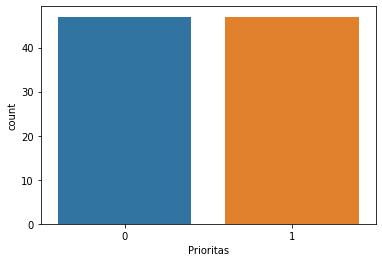

In [ ]:
sns.countplot(y_train)
plt.show()

#Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

#Modeling 

In [ ]:
#creating dictionary for storing different models accuracy
model_comparison={}

In [ ]:
# %% Function for plotting ROC_AUC curve

def plot_roc_auc_score(y_test, preds):
    '''
    Takes actual and predicted(probabilities) as input and plots the Receiver
    Operating Characteristic (ROC) curve
    '''
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

##Logistic Regression

In [ ]:
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5,scoring="recall")
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Logistic Regression']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 74.19%
Model F1-Score : 74.36%
Cross Val Accuracy: 81.11 %
Cross Val Standard Deviation: 11.46 %
              precision    recall  f1-score   support

           0       0.81      0.72      0.76        18
           1       0.67      0.77      0.71        13

    accuracy                           0.74        31
   macro avg       0.74      0.75      0.74        31
weighted avg       0.75      0.74      0.74        31



Confusion Matrix of Logistic Regression Classifier: 
 [[13  3]
 [ 5 10]]


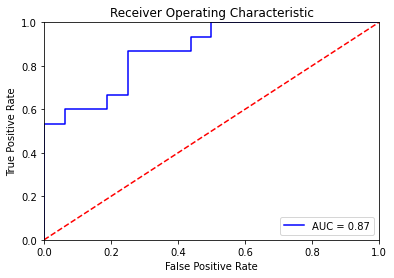

In [ ]:
print("Confusion Matrix of Logistic Regression Classifier: \n", confusion_matrix(y_test,y_pred))
plot_roc_auc_score(y_test, classifier.predict_proba(X_test)[:,1])

In [ ]:
#from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
#print('Precision: %.3f' % precision_score(y_test, y_pred))

##Decision Tree

In [ ]:
classifier=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5,scoring="recall")
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Decision Tree']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 64.52%
Model F1-Score : 64.97%
Cross Val Accuracy: 87.11 %
Cross Val Standard Deviation: 8.45 %
              precision    recall  f1-score   support

           0       0.75      0.63      0.69        19
           1       0.53      0.67      0.59        12

    accuracy                           0.65        31
   macro avg       0.64      0.65      0.64        31
weighted avg       0.67      0.65      0.65        31



Confusion Matrix of Decision Tree Classifier: 
 [[12  4]
 [ 7  8]]


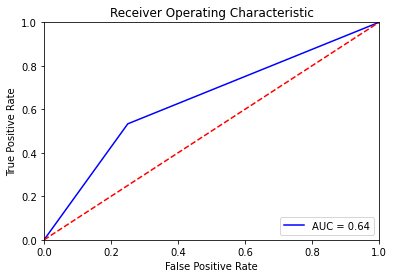

In [ ]:
print("Confusion Matrix of Decision Tree Classifier: \n", confusion_matrix(y_test,y_pred))
plot_roc_auc_score(y_test, classifier.predict_proba(X_test)[:,1])

##KNN

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=5,p=1)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['KNN']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 77.42%
Model F1-Score : 77.71%
Cross Val Accuracy: 79.77 %
Cross Val Standard Deviation: 4.03 %
              precision    recall  f1-score   support

           0       0.88      0.74      0.80        19
           1       0.67      0.83      0.74        12

    accuracy                           0.77        31
   macro avg       0.77      0.79      0.77        31
weighted avg       0.79      0.77      0.78        31



Confusion Matrix of KNN Classifier: 
 [[14  2]
 [ 5 10]]


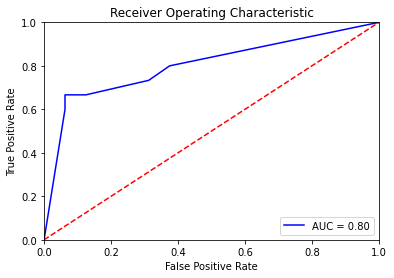

In [ ]:
print("Confusion Matrix of KNN Classifier: \n", confusion_matrix(y_test,y_pred))
plot_roc_auc_score(y_test, classifier.predict_proba(X_test)[:,1])

##Naive Bayes

In [ ]:
classifier=GaussianNB()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Naive Bayes']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 77.42%
Model F1-Score : 78.83%
Cross Val Accuracy: 81.87 %
Cross Val Standard Deviation: 7.98 %
              precision    recall  f1-score   support

           0       1.00      0.70      0.82        23
           1       0.53      1.00      0.70         8

    accuracy                           0.77        31
   macro avg       0.77      0.85      0.76        31
weighted avg       0.88      0.77      0.79        31



Confusion Matrix of Naive Bayes Classifier: 
 [[16  0]
 [ 7  8]]


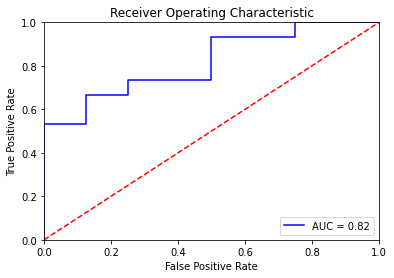

In [ ]:
print("Confusion Matrix of Naive Bayes Classifier: \n", confusion_matrix(y_test,y_pred))
plot_roc_auc_score(y_test, classifier.predict_proba(X_test)[:,1])

##Random Forest

In [ ]:
classifier=RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Random Forest']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 77.42%
Model F1-Score : 77.71%
Cross Val Accuracy: 79.77 %
Cross Val Standard Deviation: 7.03 %
              precision    recall  f1-score   support

           0       0.88      0.74      0.80        19
           1       0.67      0.83      0.74        12

    accuracy                           0.77        31
   macro avg       0.77      0.79      0.77        31
weighted avg       0.79      0.77      0.78        31



Confusion Matrix of Random Forest Classifier: 
 [[14  2]
 [ 5 10]]


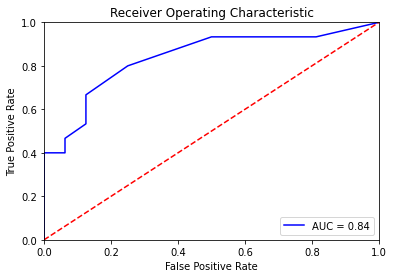

In [ ]:
print("Confusion Matrix of Random Forest Classifier: \n", confusion_matrix(y_test,y_pred))
plot_roc_auc_score(y_test, classifier.predict_proba(X_test)[:,1])

##Xg Boost

In [ ]:
classifier = XGBClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Xg Boost']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 64.52%
Model F1-Score : 64.52%
Cross Val Accuracy: 82.92 %
Cross Val Standard Deviation: 6.31 %
              precision    recall  f1-score   support

           0       0.62      0.67      0.65        15
           1       0.67      0.62      0.65        16

    accuracy                           0.65        31
   macro avg       0.65      0.65      0.65        31
weighted avg       0.65      0.65      0.65        31



Confusion Matrix of XGB Classifier: 
 [[10  6]
 [ 5 10]]


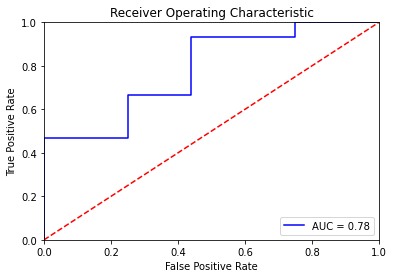

In [ ]:
print("Confusion Matrix of XGB Classifier: \n", confusion_matrix(y_test,y_pred))
plot_roc_auc_score(y_test, classifier.predict_proba(X_test)[:,1])

#Models Comparison

In [ ]:
Model_com_df=pd.DataFrame(model_comparison).T
Model_com_df.columns=['Model Accuracy','Model F1-Score','CV Accuracy','CV std']
Model_com_df=Model_com_df.sort_values(by='Model F1-Score',ascending=False)
Model_com_df.style.format("{:.2%}").background_gradient(cmap='Blues')

,Model Accuracy,Model F1-Score,CV Accuracy,CV std
Naive Bayes,77.42%,78.83%,81.87%,7.98%
KNN,77.42%,77.71%,79.77%,4.03%
Random Forest,77.42%,77.71%,79.77%,7.03%
Logistic Regression,74.19%,74.36%,81.11%,11.46%
Decision Tree,64.52%,64.97%,87.11%,8.45%
Xg Boost,64.52%,64.52%,82.92%,6.31%


##Maximum Accuracies in each Column

In [ ]:
Model_com_df.style.highlight_max().set_caption("Maximum Score in each Column").format("{:.2%}")

,Model Accuracy,Model F1-Score,CV Accuracy,CV std
Naive Bayes,77.42%,78.83%,81.87%,7.98%
KNN,77.42%,77.71%,79.77%,4.03%
Random Forest,77.42%,77.71%,79.77%,7.03%
Logistic Regression,74.19%,74.36%,81.11%,11.46%
Decision Tree,64.52%,64.97%,87.11%,8.45%
Xg Boost,64.52%,64.52%,82.92%,6.31%


##Minimum Accuracies in each Column

In [ ]:
Model_com_df.style.highlight_min().set_caption("Minimum Score in each Column").format("{:.2%}")

,Model Accuracy,Model F1-Score,CV Accuracy,CV std
Naive Bayes,77.42%,78.83%,81.87%,7.98%
KNN,77.42%,77.71%,79.77%,4.03%
Random Forest,77.42%,77.71%,79.77%,7.03%
Logistic Regression,74.19%,74.36%,81.11%,11.46%
Decision Tree,64.52%,64.97%,87.11%,8.45%
Xg Boost,64.52%,64.52%,82.92%,6.31%
